In [7]:
from netCDF4 import Dataset

mrsofile = '/work/kajiyama/data/cmip6/raw/AWI-ESM-1-1-LR/mrso/mrso_Lmon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_185001-185012.nc'
sncfile = '/work/kajiyama/data/cmip6/raw/AWI-ESM-1-1-LR/snc/snc_LImon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_185001-185012.nc'
tslfile = '/work/kajiyama/data/cmip6/raw/AWI-ESM-1-1-LR/tsl/tsl_Lmon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_185001-185012.nc'
prfile = '/work/kajiyama/data/cmip6/raw/AWI-ESM-1-1-LR/pr/pr_Amon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_185001-185012.nc'
tosfile = '/work/kajiyama/data/cmip6/raw/AWI-ESM-1-1-LR/tos/tos_Omon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_185001-185012.nc'
ds = Dataset(tslfile, 'r')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: standard
    branch_time_in_child: 0.0
    branch_time_in_parent: 96057.0
    creation_date: 2020-04-01T06:49:57Z
    data_specs_version: 01.00.30
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.AWI.AWI-ESM-1-1-LR.historical.none.r1i1p1f1
    grid: All grid attributes are set for the native grid and based on information from attribute source.
    grid_label: gn
    history: 2020-04-01T06:49:57Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: Alfred Wegener Institute, Helmholtz Centre for Polar and Marine Research, Am Handelshafen 12, 27570 Bremerhaven, Germany
    institut

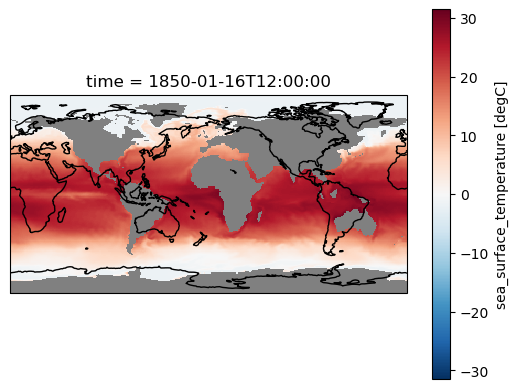

In [12]:
from cdo import Cdo
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray

infile = tosfile
variable = 'tos'

cdo = Cdo()
projection = ccrs.PlateCarree(central_longitude=180)
img_extent = (-180, 180, -90, 90)
val = cdo.remapycon('global_1', input=f'-seltimestep,1 '+infile, returnXArray=variable)
data = val.plot(subplot_kws=dict(projection=projection, facecolor='gray'),
                transform=projection)
data.axes.coastlines()
plt.show()